#### The script contains:

#### 1. Importing Libraries & Data
#### 2. Picking out variables for exploratory visual analysis
#### 3. Create a correlation matrix heatmap
#### 4. Create scatterplot for the variables with the strongest correlations
#### 5. Create a pair plot
#### 6. Create categorical plot
#### 7. Revisit the questions from previous exercise
#### 8. Define hypotheses

#### 1. Importing Libraries & Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A6 exercise/Gun Violence Analysis'

df = pd.read_csv (os.path.join(path,'02. Data', 'Prepared Data', 'gun_violence_data_wrangled.csv'), index_col = False)
df

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,...,NaN,0,4,5,0,0,3,1,4,1
1,1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,...,NaN,1,3,4,0,0,1,0,4,1
2,2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,...,2.0,1,3,5,0,0,5,0,3,2
3,3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,...,NaN,4,0,4,0,0,3,1,3,1
4,4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,...,2.0,2,2,3,1,0,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,239672,1083142,2018-03-31,Saturday,31,3,2018,Louisiana,Rayne,North Riceland Road and Highway 90,...,1.0,0,0,1,0,0,0,1,0,1
239673,239673,1083139,2018-03-31,Saturday,31,3,2018,Louisiana,Natchitoches,247 Keyser Ave,...,1.0,1,0,2,0,0,2,0,1,1
239674,239674,1083151,2018-03-31,Saturday,31,3,2018,Louisiana,Gretna,1300 block of Cook Street,...,1.0,0,1,1,0,0,1,0,1,0
239675,239675,1082514,2018-03-31,Saturday,31,3,2018,Texas,Houston,12630 Ashford Point Dr,...,1.0,1,0,1,0,0,1,0,1,0


In [3]:
# Drop Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])
df

,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,latitude,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,40.3467,...,NaN,0,4,5,0,0,3,1,4,1
1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,33.9090,...,NaN,1,3,4,0,0,1,0,4,1
2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,41.4455,...,2.0,1,3,5,0,0,5,0,3,2
3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,39.6518,...,NaN,4,0,4,0,0,3,1,3,1
4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,36.1140,...,2.0,2,2,3,1,0,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Saturday,31,3,2018,Louisiana,Rayne,North Riceland Road and Highway 90,NaN,...,1.0,0,0,1,0,0,0,1,0,1
239673,1083139,2018-03-31,Saturday,31,3,2018,Louisiana,Natchitoches,247 Keyser Ave,31.7537,...,1.0,1,0,2,0,0,2,0,1,1
239674,1083151,2018-03-31,Saturday,31,3,2018,Louisiana,Gretna,1300 block of Cook Street,29.9239,...,1.0,0,1,1,0,0,1,0,1,0
239675,1082514,2018-03-31,Saturday,31,3,2018,Texas,Houston,12630 Ashford Point Dr,29.7201,...,1.0,1,0,1,0,0,1,0,1,0


In [4]:
df.columns

Index(['incident_id', 'date', 'day_of_week', 'day', 'month', 'year', 'state',
       'city_or_county', 'address', 'latitude', 'longitude', 'incident_event',
       'incident_shot', 'n_guns_involved', 'n_killed', 'n_injured', 'n_adult',
       'n_teen', 'n_child', 'n_male', 'n_female', 'n_victim', 'n_suspect'],
      dtype='object')

#### 2. Picking out variables for exploratory visual analysis

In [5]:
# Creating subset for exploratory visual analysis

df_sub = df[['day', 'month', 'n_guns_involved', 'n_killed', 'n_injured', 'n_adult', 'n_teen', 'n_child',
             'n_male', 'n_female', 'n_victim', 'n_suspect', 'longitude', 'latitude']]

df_sub.head()

,day,month,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,longitude,latitude
0,1,1,NaN,0,4,5,0,0,3,1,4,1,-79.8559,40.3467
1,1,1,NaN,1,3,4,0,0,1,0,4,1,-118.3330,33.9090
2,1,1,2.0,1,3,5,0,0,5,0,3,2,-82.1377,41.4455
3,5,1,NaN,4,0,4,0,0,3,1,3,1,-104.8020,39.6518
4,7,1,2.0,2,2,3,1,0,2,2,3,1,-79.9569,36.1140


#### 3. Create a correlation matrix heatmap

In [6]:
# Create correlation

df_sub.corr()

,day,month,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,longitude,latitude
day,1.000000,0.004923,-0.001948,-0.000542,0.002767,-0.000588,0.003033,-0.002529,0.000569,0.002857,0.002392,0.000421,0.004493,0.005111
month,0.004923,1.000000,-0.000299,0.002522,0.017748,-0.010836,-0.001560,-0.002025,0.009933,-0.001236,0.024234,-0.010812,0.006517,0.015401
n_guns_involved,-0.001948,-0.000299,1.000000,-0.028200,-0.038843,0.017489,-0.005606,-0.006035,0.013739,-0.001216,-0.048980,0.063704,-0.016107,-0.001341
n_killed,-0.000542,0.002522,-0.028200,1.000000,-0.125425,0.281437,0.025190,0.069948,0.207306,0.203497,0.373827,-0.015834,-0.062149,-0.080078
n_injured,0.002767,0.017748,-0.038843,-0.125425,1.000000,0.286327,0.105779,0.060570,0.271211,0.165591,0.691518,-0.102809,0.036962,-0.011379
n_adult,-0.000588,-0.010836,0.017489,0.281437,0.286327,1.000000,-0.096737,0.010233,0.735148,0.359904,0.505240,0.569323,0.004110,-0.048084
n_teen,0.003033,-0.001560,-0.005606,0.025190,0.105779,-0.096737,1.000000,0.013264,0.190798,0.072816,0.128965,0.181988,0.006399,-0.005534
n_child,-0.002529,-0.002025,-0.006035,0.069948,0.060570,0.010233,0.013264,1.000000,0.058089,0.156745,0.188484,0.018430,-0.005128,-0.019203
n_male,0.000569,0.009933,0.013739,0.207306,0.271211,0.735148,0.190798,0.058089,1.000000,0.032706,0.441798,0.660859,0.002713,-0.033527
n_female,0.002857,-0.001236,-0.001216,0.203497,0.165591,0.359904,0.072816,0.156745,0.032706,1.000000,0.346855,0.189840,-0.015096,-0.034829


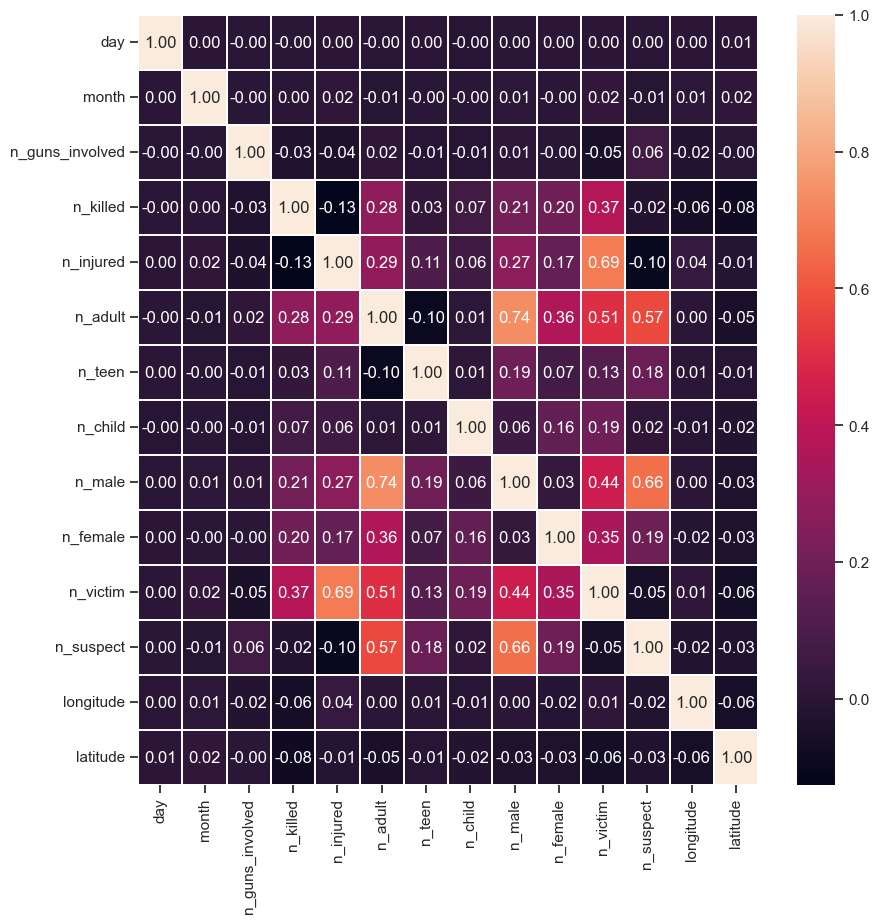

In [23]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_heatmap = sns.heatmap(df_sub.corr(), annot = True, fmt=".2f", linewidths=.3, ax = ax)

#### Based on the above heatmap;
#### - n_male and n_adult, as well as n_male and n_suspect have strong positive relationship
#### - n_victim and n_injured have stronger relationship compared to n_victim and n_killed

In [25]:
# Save heatmap visualisation

corr_heatmap.figure.savefig(os.path.join(path, '04. Analysis', 'corr_heatmap.png'), bbox_inches='tight')

#### 4. Create scatterplot for the variables with the strongest correlations

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


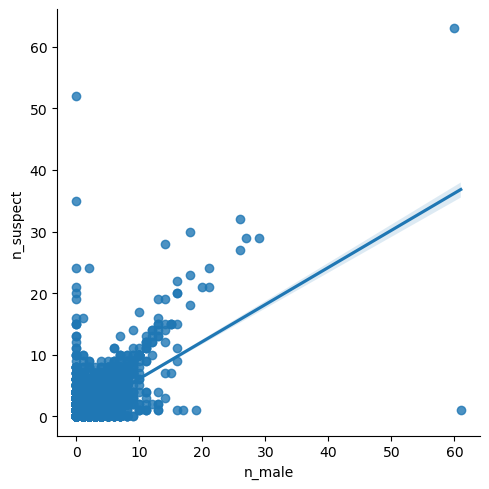

In [27]:
# Create a scatterplot for the "n_male" and "n_suspect" columns in seaborn

scatterplot_1 = sns.lmplot(x = 'n_male', y = 'n_suspect', data = df)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


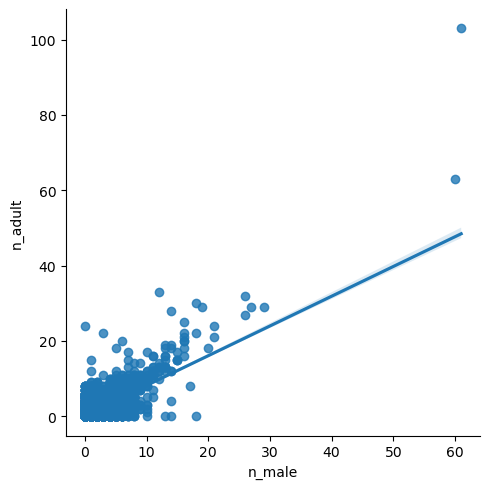

In [24]:
# Create a scatterplot for the "n_male" and "n_adult" columns in seaborn

scatterplot_2 = sns.lmplot(x = 'n_male', y = 'n_adult', data = df)

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


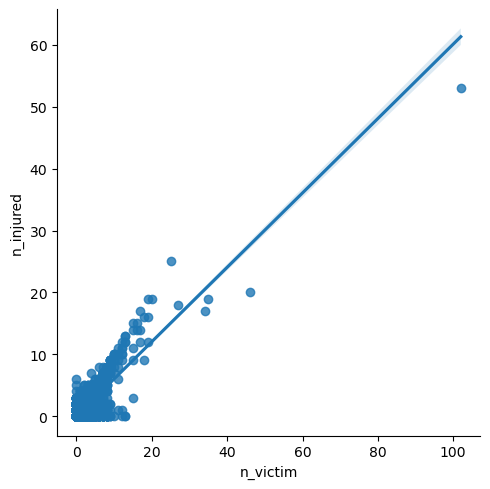

In [26]:
# Create a scatterplot for the "n_victim" and "n_injured" columns in seaborn

scatterplot_3 = sns.lmplot(x = 'n_victim', y = 'n_injured', data = df)

In [28]:
# Save scatterplot visualisations

scatterplot_1.figure.savefig(os.path.join(path, '04. Analysis', 'scatterplot_1.png'))
scatterplot_2.figure.savefig(os.path.join(path, '04. Analysis', 'scatterplot_2.png'))
scatterplot_3.figure.savefig(os.path.join(path, '04. Analysis', 'scatterplot_3.png'))

#### Based on above scatterplots, there are indeed strong positive linear relationship between the variables. 

#### 5. Create a pair plot

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

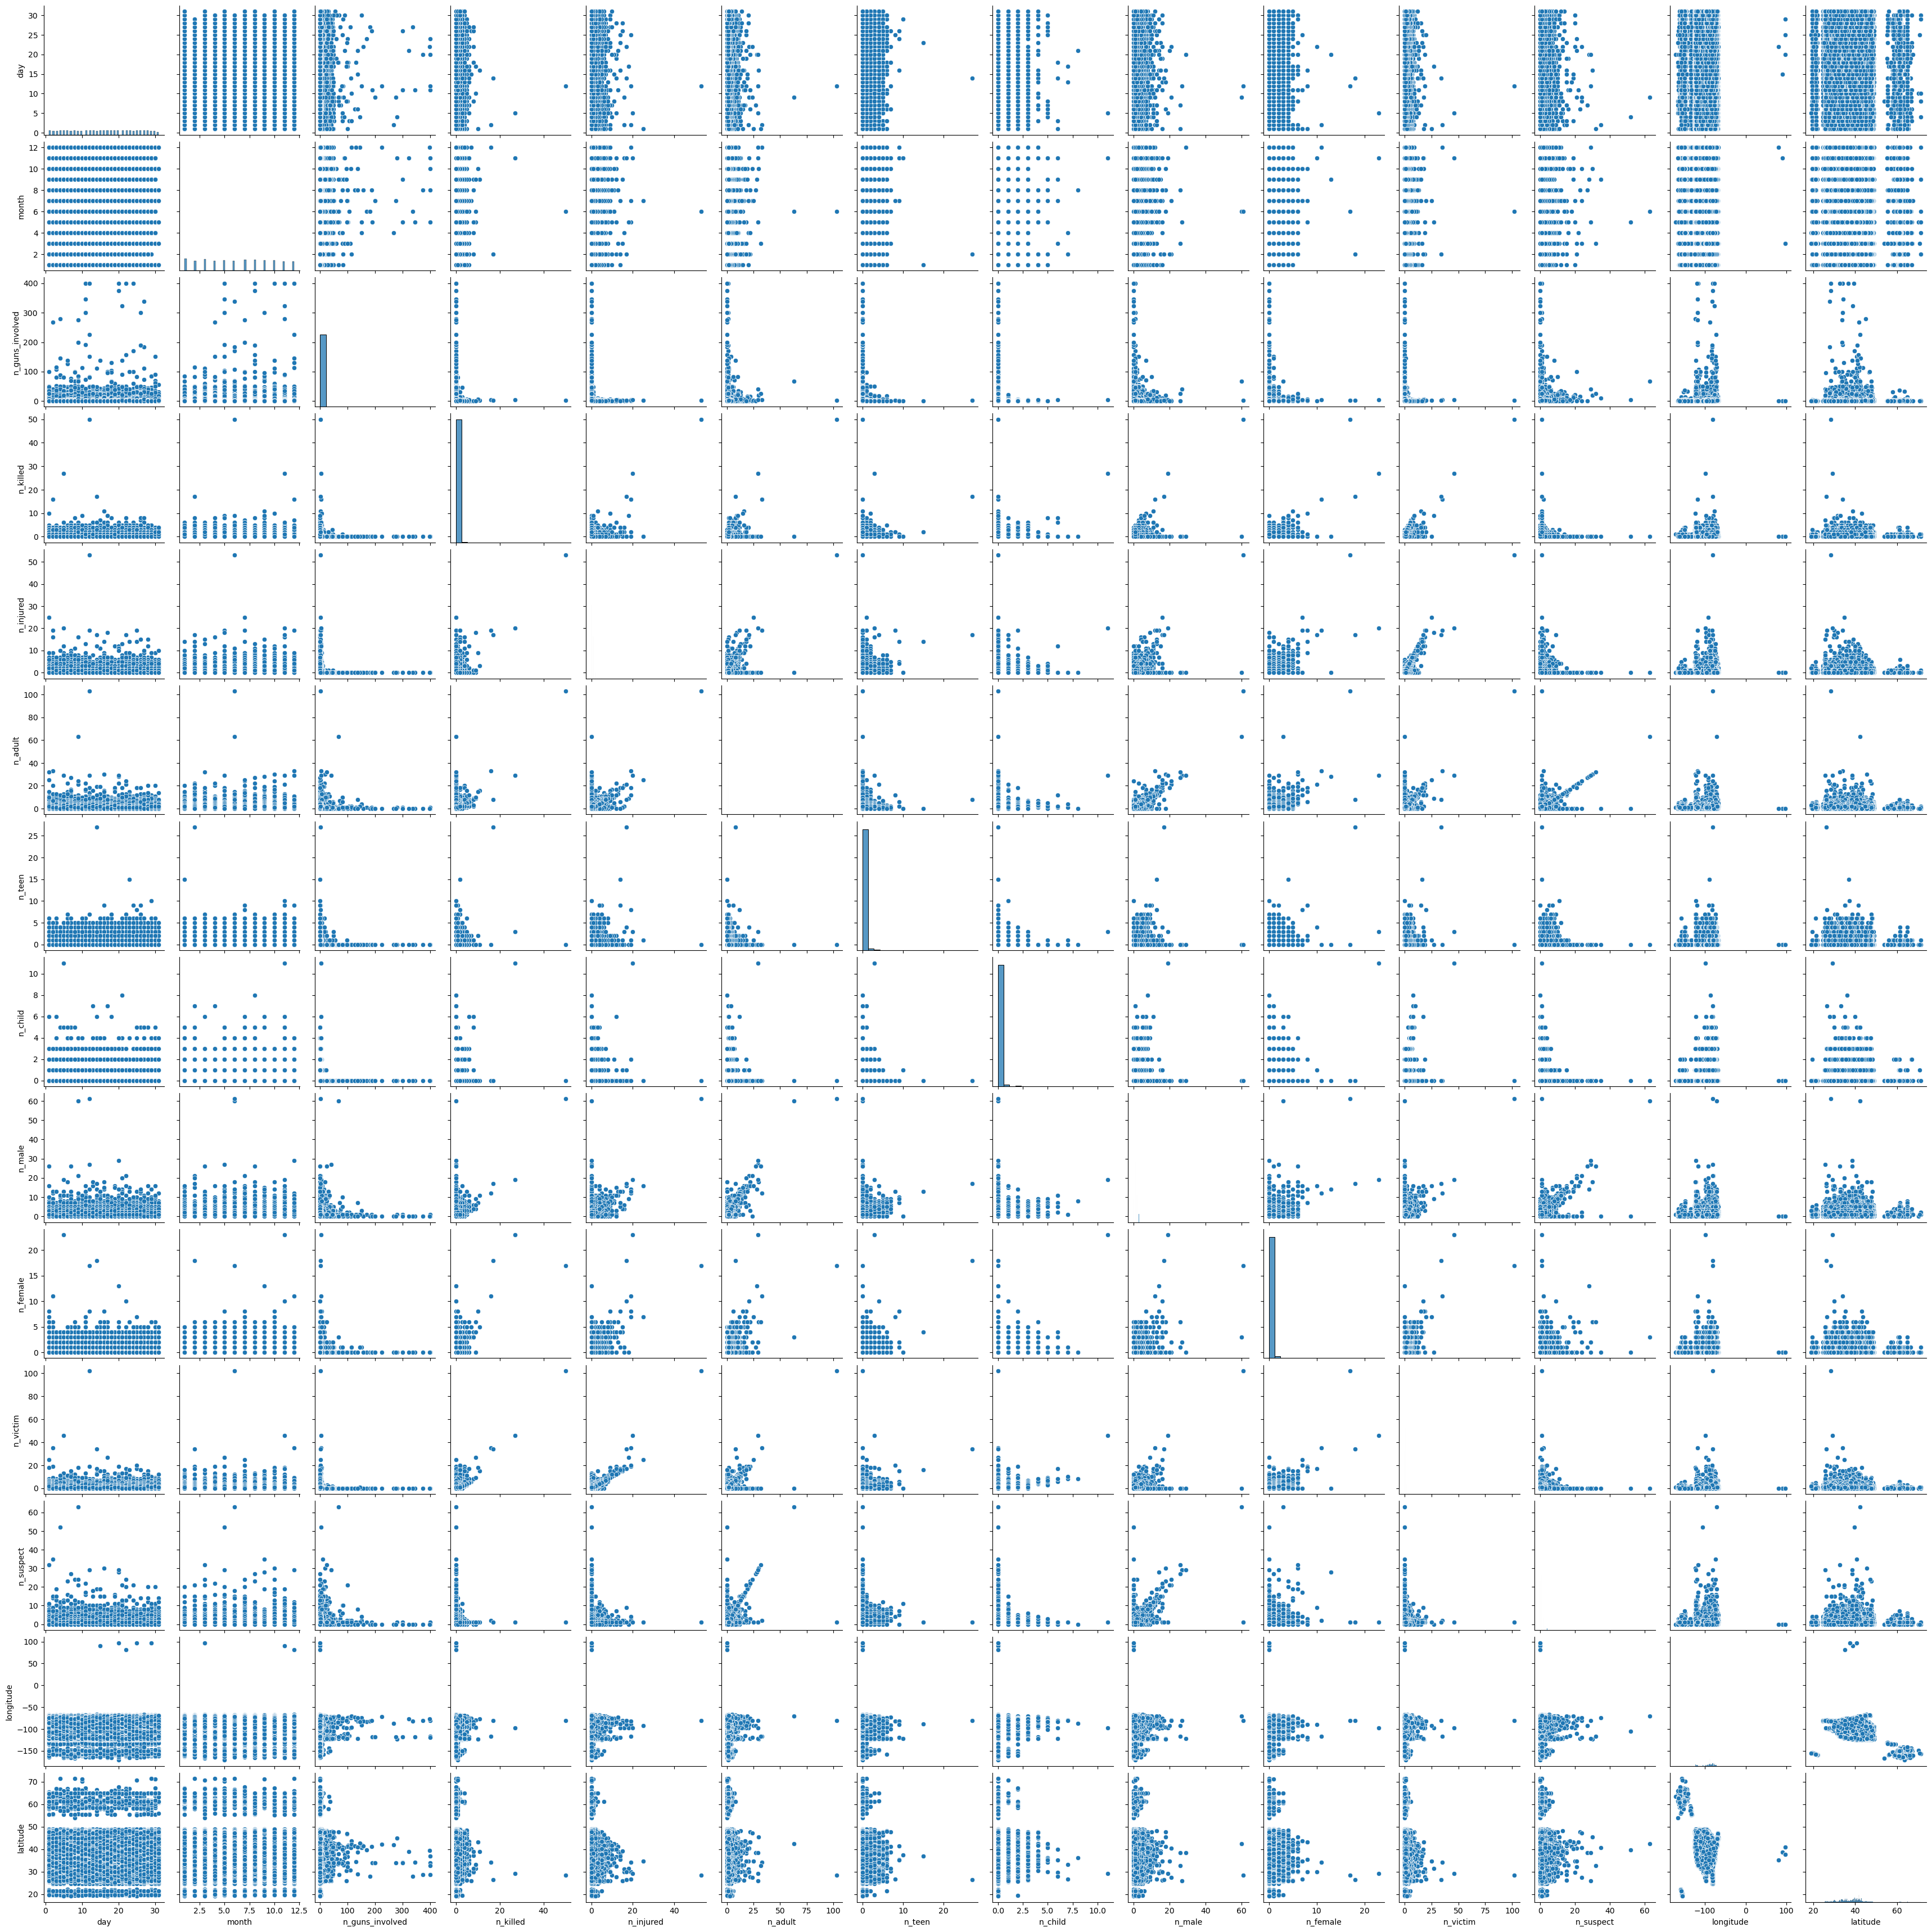

In [29]:
# Create a pair plot 

pairplot = sns.pairplot(df_sub)

In [30]:
# Save pairplot visualisations

pairplot.figure.savefig(os.path.join(path, '04. Analysis', 'pairplot.png'))

#### Based on the pairplot above, we can see that the relationship between n_male and n_suspect as well as n_suspect and n_adult are both strong.

#### 6. Create categorical plot

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Count of injured')

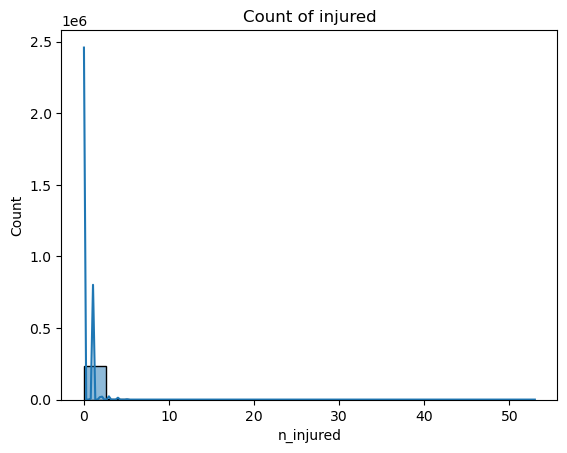

In [40]:
# Creating histogram to visualise the distribution of n_injured

hist_1 = sns.histplot(df['n_injured'], bins = 20, kde = True)
plt.title('Count of injured')

In [35]:
df_sub['n_injured'].describe()

count    239677.000000
mean          0.494007
std           0.729952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          53.000000
Name: n_injured, dtype: float64

In [41]:
# Save histogram

hist_1.figure.savefig(os.path.join(path, '04. Analysis', 'hist_1.png'))

In [38]:
# Creating category for n_injured

df.loc[df['n_injured'] < 2, 'injured_flag'] = 'single injured'
df.loc[(df['n_injured'] >= 2) & (df['n_injured'] < 6), 'injured_flag'] = 'multiple injured'
df.loc[df['n_injured'] >= 6, 'injured_flag'] = 'mass injured'

In [39]:
df['injured_flag'].value_counts(dropna = False)

injured_flag
single injured      224473
multiple injured     14998
mass injured           206
Name: count, dtype: int64

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


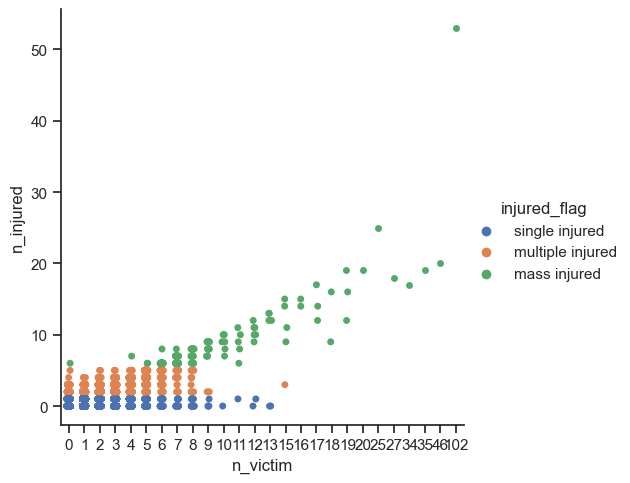

In [63]:
# Create a categorical plot

sns.set(style="ticks")
catplot_1 = sns.catplot(x="n_victim", y="n_injured",hue="injured_flag", data=df)

In [64]:
# Save catplot

catplot_1.figure.savefig(os.path.join(path, '04. Analysis', 'catplot_1.png'))

#### Based on above categorical plot, we can see that there are certain cases in which there are a lot of victim and only small number of people injured.

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Count of suspect')

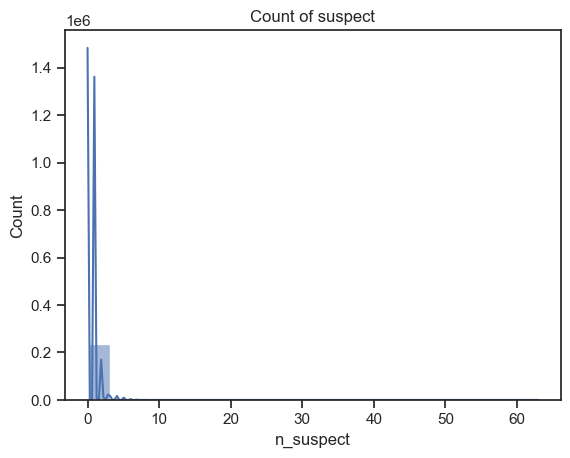

In [50]:
# Creating histogram to visualise the distribution of n_suspect

hist_2 = sns.histplot(df['n_suspect'], bins = 20, kde = True)
plt.title('Count of suspect')

In [7]:
df_sub['n_suspect'].describe()

count    239677.000000
mean          0.831381
std           0.974121
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          63.000000
Name: n_suspect, dtype: float64

In [52]:
# Save histogram

hist_2.figure.savefig(os.path.join(path, '04. Analysis', 'hist_2.png'))

In [8]:
# Creating category for n_suspect

df.loc[df['n_suspect'] < 2, 'suspect_flag'] = 'single suspect'
df.loc[(df['n_suspect'] >= 2) & (df['n_injured'] < 6), 'suspect_flag'] = 'multiple suspects'
df.loc[df['n_suspect'] >= 6, 'suspect_flag'] = 'mass suspects'

In [9]:
df['suspect_flag'].value_counts(dropna = False)

suspect_flag
single suspect       203557
multiple suspects     35568
mass suspects           497
nan                      55
Name: count, dtype: int64

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


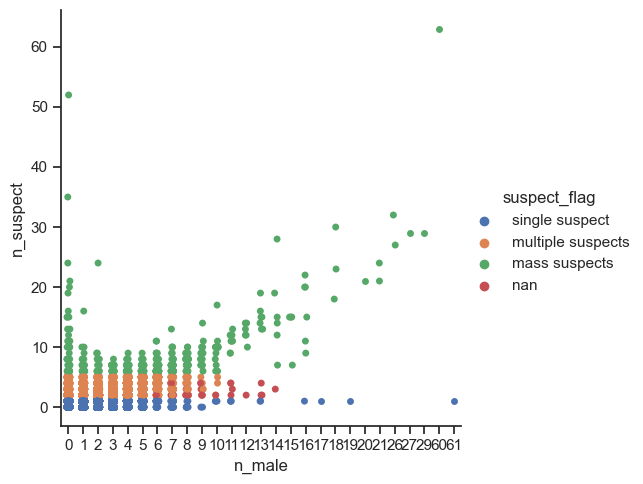

In [10]:
# Create a categorical plot

sns.set(style="ticks")
catplot_2 = sns.catplot(x="n_male", y="n_suspect",hue="suspect_flag", data=df)

In [11]:
# Save catplot

catplot_2.figure.savefig(os.path.join(path, '04. Analysis', 'catplot_2.png'))

#### 7. Revisit the questions from previous exercise

#### Are there any seasonal pattern in gun violence?

In [71]:
# Checking incidents in daily basis

df['day_of_week'].value_counts()

day_of_week
Sunday       37052
Saturday     36096
Wednesday    34126
Monday       33760
Tuesday      33307
Friday       32775
Thursday     32561
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

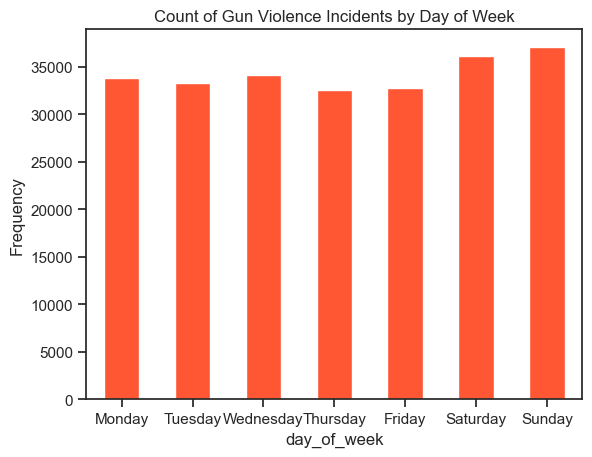

In [102]:
# Create bar chart
day_counts = df['day_of_week'].value_counts().sort_index()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

bar_1 = day_counts.loc[day_order].plot.bar(color='#FF5733')
plt.title('Count of Gun Violence Incidents by Day of Week')
plt.ylabel('Frequency')
plt.xticks(rotation=360)

In [103]:
# Save visualisation

bar_1.figure.savefig(os.path.join(path, '04. Analysis', 'bar_incident_day.png'))

#### There are not much difference of incident counts between days, however, the highest count of incidents happen on the weekends.

#### How has the frequency change changed over time?

In [100]:
# Checking incidents count through the year

df['year'].value_counts()

year
2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
2013      278
Name: count, dtype: int64

(array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.]),
 [Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019')])

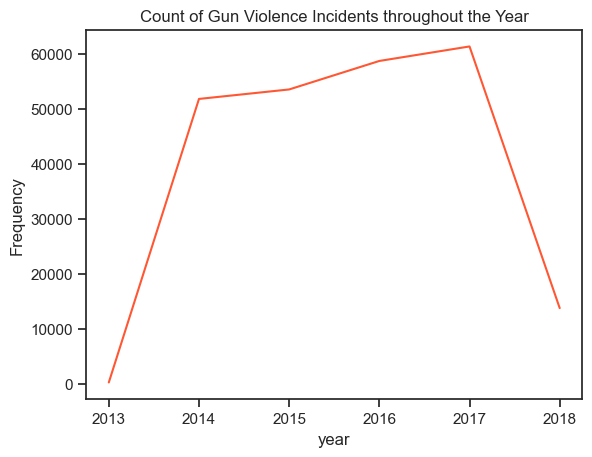

In [106]:
# Create Line chart

line_1 = df['year'].value_counts().sort_index().plot.line(color='#FF5733')
plt.title('Count of Gun Violence Incidents throughout the Year')
plt.ylabel('Frequency')
plt.xticks(rotation=360)

#### There has been an increase each year on gun violence incidents in US. The data in 2013 was not accurate as not much incidents were recorded, and the data count in 2018 ended in March so it was not completed. However, we can see an increase throughout 2014 - 2017.

In [107]:
# Save visualisation

line_1.figure.savefig(os.path.join(path, '04. Analysis', 'line_incident_year.png'))

#### What types of events are most frequently associated with gun violence incidents?

In [15]:
df['incident_event'].value_counts()

incident_event
Others                 156334
Armed robbery           19586
Drug involvement        15343
Domestic Violence        8344
Home Invasion            7976
Accidental Shooting      7629
Suicide                  6101
Gang involvement         5677
Bar/club incident        4149
Car-jacking              3657
Defensive Use            2795
Gun at school            2086
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

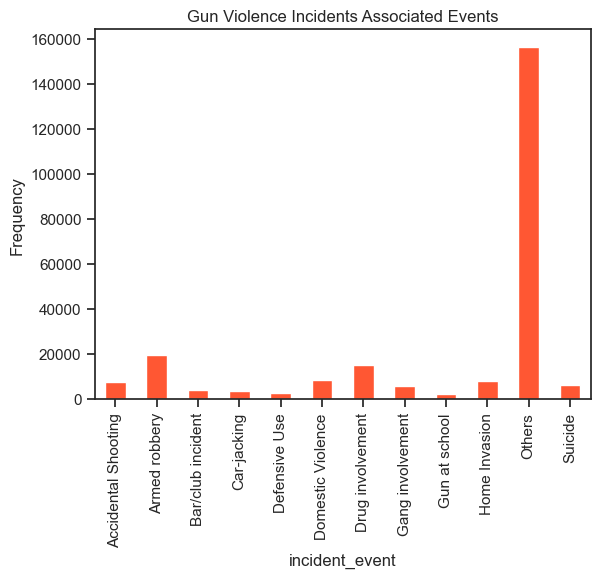

In [16]:
# Create bar chart

bar_2 = df['incident_event'].value_counts().sort_index().plot.bar(color='#FF5733')
plt.title('Gun Violence Incidents Associated Events')
plt.ylabel('Frequency')

#### A lot of the data did not record the event of the incident thus, the count of 'others' category is high. However, we can see the next high count is with armed robbery, drug involvement, and domestic violence. 

In [22]:
# Save visualisation

bar_2.figure.savefig(os.path.join(path, '04. Analysis', 'bar_incident_event.png'), bbox_inches='tight')

#### 8. Define hypotheses

#### Based on analysis from above, here are a few hypotheses:
#### - There is a higher probability of the suspect in a gun violence incidents to be an adult male
#### - A lot of time, the victims are injured in these incidents